In [ ]:

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Prepare a data
X = np.arange(-10, 10, 0.5)
Y = np.arange(-10, 10, 0.5)
X, Y = np.meshgrid(X, Y)
Z = -X**2 + X*Y + Y**2 + 2

# Plot a surface
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

xs = np.ones(20)*2
ys = np.ones(20)*3
zs = np.linspace(-200, 200, 20)
ax.plot(xs, ys, zs, ls='--', color='r')

ax.set_zlim(-200, 200)
ax.view_init(0, 40)
#fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

In [ ]:
# Configure the figure
fig2, ax = plt.subplots()  
ax.set_title("Multiple graphs on one plot")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.set_xlim([-10,10])
ax.set_ylim([-5,25])

# First graph
x = np.linspace(-10, 10, 50)
y = x*x + x - 1 
ax.plot(x,y, '-', label='f(x)', color='red', linewidth=1)

# Second graph
x = np.linspace(-10, 10, 50) 
y = -3*x -1
print(x[0], x[-1])
ax.plot(x,y, label='g(x)', color='green', linewidth=1, linestyle='-.')
plt.text(-4,11, "(-4,11)")

# Add graph's legend
ax.legend()

plt.show()

In [ ]:
!pip install scipy

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
from scipy.io import wavfile
samplerate, data = wavfile.read('audio.wav')
fig2, ax = plt.subplots() 
x = np.arange(len(data))
ax.plot(x, data)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def f(x):
    return x**2 + x - 1

def g(x):
    return -3*x - 1

def find_intersections():
    intersection_func = lambda x: f(x) - g(x)
    x_intersections = fsolve(intersection_func, [-2, 2])  # Initial guesses
    y_intersections = f(x_intersections)
    return x_intersections, y_intersections

x = np.linspace(-3, 3, 400)
y_f = f(x)
y_g = g(x)

x_int, y_int = find_intersections()

plt.figure(figsize=(8, 6))
plt.plot(x, y_f, label='$f(x) = x^2 + x - 1$', color='blue')
plt.plot(x, y_g, label='$g(x) = -3x - 1$', color='red')
plt.scatter(x_int, y_int, color='black', zorder=3)

for i in range(len(x_int)):
    plt.annotate(f'({x_int[i]:.2f}, {y_int[i]:.2f})', (x_int[i], y_int[i]),
                 textcoords="offset points", xytext=(10,10), ha='center')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.title("Plot of f(x) and g(x) with Intersection Points")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

g = 9.81  # Acceleration due to gravity (m/s^2)
v0 = 7  # Initial velocity in m/s
angle = np.radians(60)  # Convert angle to radians
x_hoop = 4.6  # Distance to hoop in meters
y_hoop = 3.05  # Hoop height in meters
y0 = 2.2  # Initial height in meters

def trajectory(x):
    return y0 + x * np.tan(angle) - (g * x**2) / (2 * v0**2 * np.cos(angle)**2)

# Find max range to extend trajectory until it hits the ground
x_max = (v0 * np.cos(angle)) * ((v0 * np.sin(angle)) + np.sqrt((v0 * np.sin(angle))**2 + 2 * g * y0)) / g
x_vals = np.linspace(0, x_max, 400)
y_vals = trajectory(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, 'g--', label="Trajectory")
plt.axhline(0, color='black', linewidth=1, label="Ground line")
plt.scatter(x_hoop, y_hoop, color='red', s=100, label="Hoop")
plt.xlabel("Distance (m)")
plt.ylabel("Height (m)")
plt.title("Basketball Shot Trajectory")
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

def plot_wav(file_path):
    sample_rate, data = wavfile.read(file_path)
    
    # Normalize the data to [-1, 1]
    data = data / np.max(np.abs(data), axis=0)
    
    # Time axis
    time = np.linspace(0, len(data) / sample_rate, num=len(data))
    
    plt.figure(figsize=(10, 4))
    plt.plot(time, data, label="Audio Signal")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.title("Waveform of .wav Audio File")
    plt.ylim([-1, 1])
    plt.legend()
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.show()

# Example usage
plot_wav("audio.wav")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def surface_plot(h):
    x = np.arange(-10, 10 + h, h)
    y = np.arange(-10, 10 + h, h)
    X, Y = np.meshgrid(x, y)
    Z = -X**2 + X*Y + Y**2
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')
    
    # Set z-limits based on min and max values of Z
    ax.set_zlim(np.min(Z), np.max(Z))
    
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Z-axis")
    ax.set_title("Surface Plot of f(x, y) = -x^2 + xy + y^2")
    plt.show()

# Example usage
surface_plot(0.5)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histogram(scores, bins=5):
    plt.figure(figsize=(8, 6))
    plt.hist(scores, bins=bins, edgecolor='black', alpha=0.7, range=(0, 100))
    
    plt.xlabel("Score Ranges")
    plt.ylabel("Frequency")
    plt.title("Histogram of Students' Scores")
    plt.xticks(np.linspace(0, 100, bins + 1))
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.show()

scores = [76, 10, 21, 61, 40, 65, 40, 95, 77, 92, 59, 81, 76, 98, 57, 51, 92, 35, 17, 61, 35]
plot_histogram(scores)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def surface_and_plane_plot(h):
    x = np.arange(-10, 10 + h, h)
    y = np.arange(-10, 10 + h, h)
    X, Y = np.meshgrid(x, y)
    
    # Define the functions
    Z_surface = -X**2 + X*Y + Y**2  # Surface f(x, y)
    Z_plane = X + Y  # Plane g(x, y)
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the surface
    ax.plot_surface(X, Y, Z_surface, cmap='viridis', alpha=0.7)
    
    # Plot the plane
    ax.plot_surface(X, Y, Z_plane, cmap='coolwarm', alpha=0.5)
    
    # Find the intersection by solving f(x, y) = g(x, y)
    intersection_mask = np.isclose(Z_surface, Z_plane, atol=0.5)
    ax.scatter(X[intersection_mask], Y[intersection_mask], Z_surface[intersection_mask], color='red', label='Intersection', s=5)
    
    # Set limits
    ax.set_zlim(np.min(Z_surface), np.max(Z_surface))
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Z-axis")
    ax.set_title("Intersection of Plane and Surface")
    ax.legend()
    
    plt.show()

# Example usage
surface_and_plane_plot(0.5)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fsolve

def exercise_1_1():
    v0 = 7
    angle = np.radians(60)
    g = 9.81
    x_hoop = 4.6
    y_hoop = 3.05
    y0 = 2.2
    
    t_flight = (v0 * np.sin(angle) + np.sqrt((v0 * np.sin(angle))**2 + 2 * g * y0)) / g
    t = np.linspace(0, t_flight, num=100)
    
    x = v0 * np.cos(angle) * t
    y = y0 + v0 * np.sin(angle) * t - 0.5 * g * t**2
    
    plt.figure()
    plt.axhline(0, color='black', linewidth=1)
    plt.plot(x, y, 'g--')
    plt.scatter(x_hoop, y_hoop, color='red', zorder=3)
    plt.xlabel('Distance')
    plt.ylabel('Height')
    plt.show()

def exercise_1_2():
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x, y)
    Z = -X**2 + X*Y + Y**2
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

def exercise_1_3():
    f = lambda x: x**2 + x - 1
    g = lambda x: -3*x - 1
    
    x_vals = np.linspace(-3, 3, 100)
    y_f = f(x_vals)
    y_g = g(x_vals)
    
    intersection = fsolve(lambda x: f(x) - g(x), [-2, 2])
    intersections = [(x, f(x)) for x in intersection]
    
    plt.figure()
    plt.plot(x_vals, y_f, 'b', label='f(x) = x^2 + x - 1')
    plt.plot(x_vals, y_g, 'r', label='g(x) = -3x - 1')
    
    for x, y in intersections:
        plt.scatter(x, y, color='black', zorder=3)
        plt.text(x, y, f'({x:.2f}, {y:.2f})', fontsize=10, verticalalignment='bottom')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

exercise_1_1()
exercise_1_2()
exercise_1_3()

In [ ]:
# %%
#Exercise 1.1
import numpy as np
import matplotlib.pyplot as plt

# Setting the constants of Exercise 1.1 for solving the question
v0 = 7  # Initial velocity (m/s)
theta = np.radians(60)  # Launch angle (radians)
g = 9.81  # Gravity (m/s²)
x_hoop = 4.6  # Distance to hoop (m)
y_hoop = 3.05  # Hoop height (m)
y0 = 2.2  # Initial height (m)

# This equation is to solve the time of flight of the ball before it hits the ground
t_flight = (v0 * np.sin(theta) + np.sqrt((v0 * np.sin(theta))**2 + 2 * g * y0)) / g

# Time array
t = np.linspace(0, t_flight, 100)

# Eqautions for trajectory of the ball
x = v0 * np.cos(theta) * t
y = y0 + v0 * np.sin(theta) * t - 0.5 * g * t**2

# Set the plot of graph
plt.figure(figsize=(8, 5))
plt.plot(x, y, 'g--', label='Trajectory')

# I choose yellow to highlight the ground line of the basketball hoop
plt.axhline(0, color='blue', linewidth=3, label='Ground')

#Standard plot functions for the graph
plt.scatter(x_hoop, y_hoop, color='red', s=100, label='Hoop')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.ylim(0, max(y) + 1)
plt.xlim(0, max(x) + 1)
plt.legend()
plt.grid()
plt.show()


# %%
#Exercise 1.4
import matplotlib.pyplot as plt

scores = [76, 10, 21, 61, 40, 65, 40, 95, 77, 92, 59, 81, 76, 98, 57, 51, 92, 35, 17, 61, 35]
plt.hist(scores, bins=[0, 20, 40, 60, 80, 100], edgecolor='black', color='green')
plt.xlabel('Score Intervals of 20 points')
plt.ylabel('Amount of Students')
plt.title('Students Score Histogram')
plt.show()


# %%
#Exercise 1.5
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile #As referenced by Mr Zhandos for the library recommendedd

#Reads the wave file of my StarWars 3 second 
sample_rate, audio_data = wavfile.read('StarWars3.wav')

# Normalizes my graph to [-1,1]
audio_data_normalized = audio_data / np.max(np.abs(audio_data))

# Make the axis of time to show duration of wav file
time = np.arange(0, len(audio_data_normalized)) / sample_rate

# Sets the plot for the waveform of my StarWars3 audio
plt.figure(figsize=(10, 4))
plt.plot(time, audio_data_normalized, color='b')
plt.title('Star Wars 3 seconds Waveform')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.ylim(-1, 1)  # Ensure the y-axis is within the normalized range
plt.grid(True)
plt.show()




### Assignments

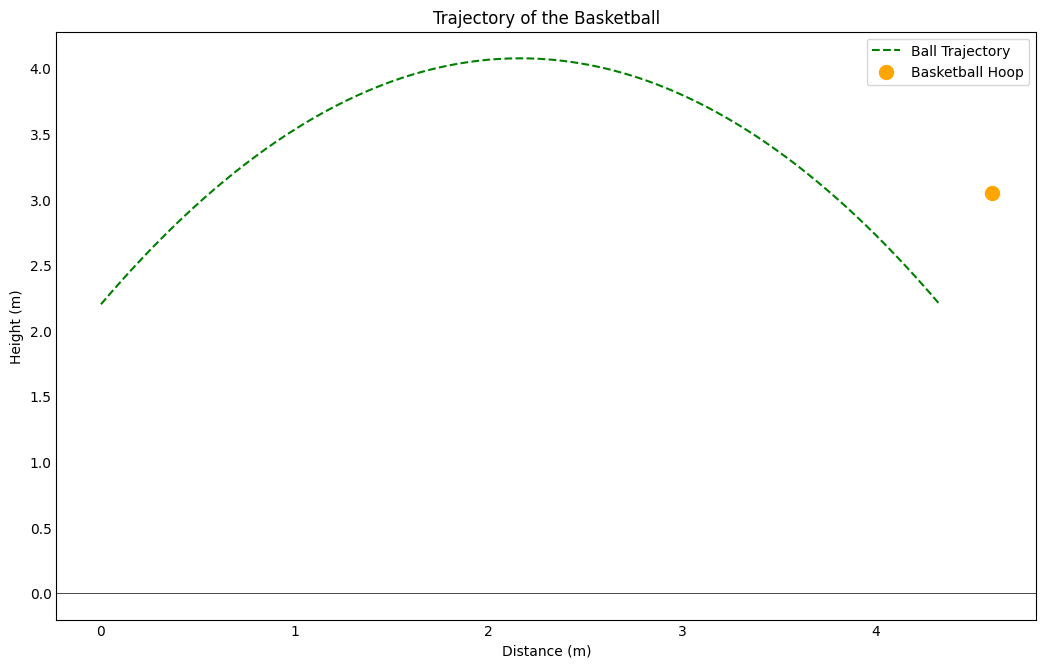

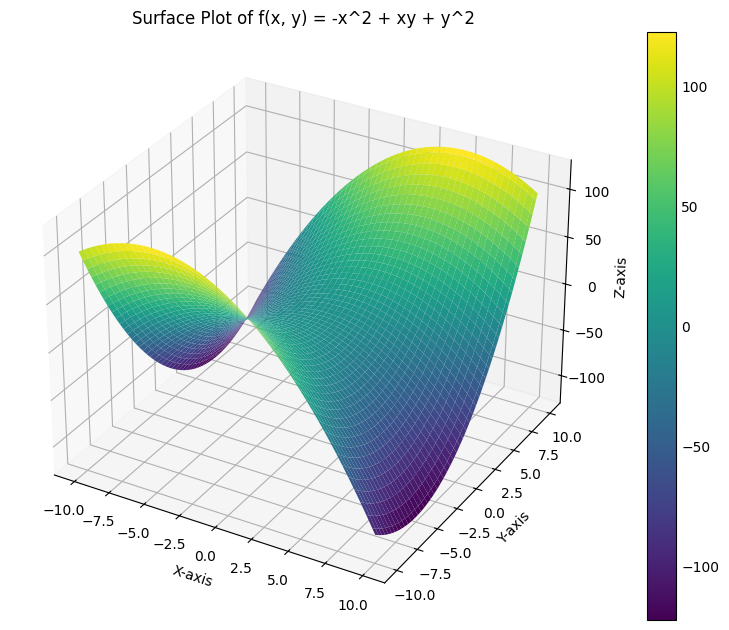

/var/folders/q3/6d_z1vds0nj29j4w3534v1xr0000gn/T/ipykernel_2346/4225674776.py:56: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  x_intersect = fsolve(intersection, [-2, 2])


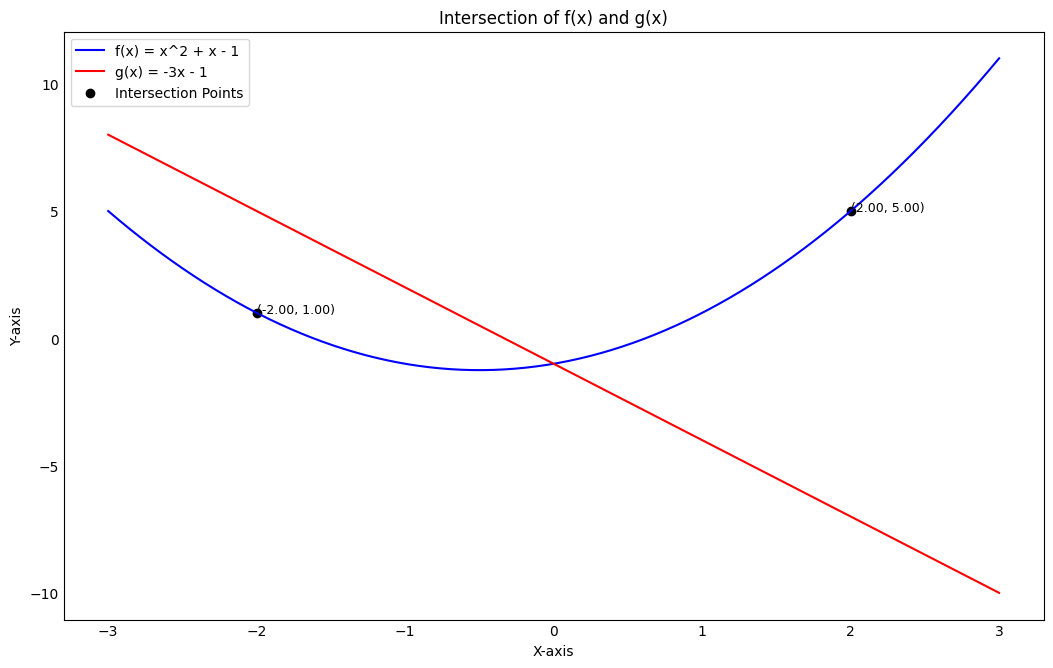

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fsolve

theta = np.radians(60)
y0 = 2.2
v0 = 7
g = 9.8
hoop_x = 4.6
hoop_y = 3.05

t_flight = 2 * v0 * np.sin(theta) / g
t = np.linspace(0, t_flight, 500)

x = v0 * np.cos(theta) * t
y = y0 + v0 * np.sin(theta) * t - 0.5 * g * t**2

x = x[y >= 0]
y = y[y >= 0]

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'g--', label="Ball Trajectory")
plt.axhline(0, color='black', linewidth=0.5)
plt.scatter([hoop_x], [hoop_y], color='orange', label="Basketball Hoop", s=100)

plt.xlabel("Distance (m)")
plt.ylabel("Height (m)")
plt.title("Trajectory of the Basketball")
plt.legend()
plt.grid()
plt.show()

# Exercise 1.2
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
x, y = np.meshgrid(x, y)
z = -x**2 + x*y + y**2

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')

ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("Surface Plot of f(x, y) = -x^2 + xy + y^2")
plt.colorbar(surf)
plt.show()

# Exercise 1.3
f = lambda x: x**2 + x - 1
g = lambda x: -3*x - 1

intersection = lambda x: f(x) - g(x)
x_intersect = fsolve(intersection, [-2, 2])
y_intersect = f(x_intersect)

x_vals = np.linspace(-3, 3, 500)
plt.figure(figsize=(10, 6))
plt.plot(x_vals, f(x_vals), label="f(x) = x^2 + x - 1", color='blue')
plt.plot(x_vals, g(x_vals), label="g(x) = -3x - 1", color='red')
plt.scatter(x_intersect, y_intersect, color='black', label="Intersection Points")

for xi, yi in zip(x_intersect, y_intersect):
    plt.text(xi, yi, f"({xi:.2f}, {yi:.2f})", fontsize=9)

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Intersection of f(x) and g(x)")
plt.legend()
plt.grid()
plt.show()

Error: bird not found.


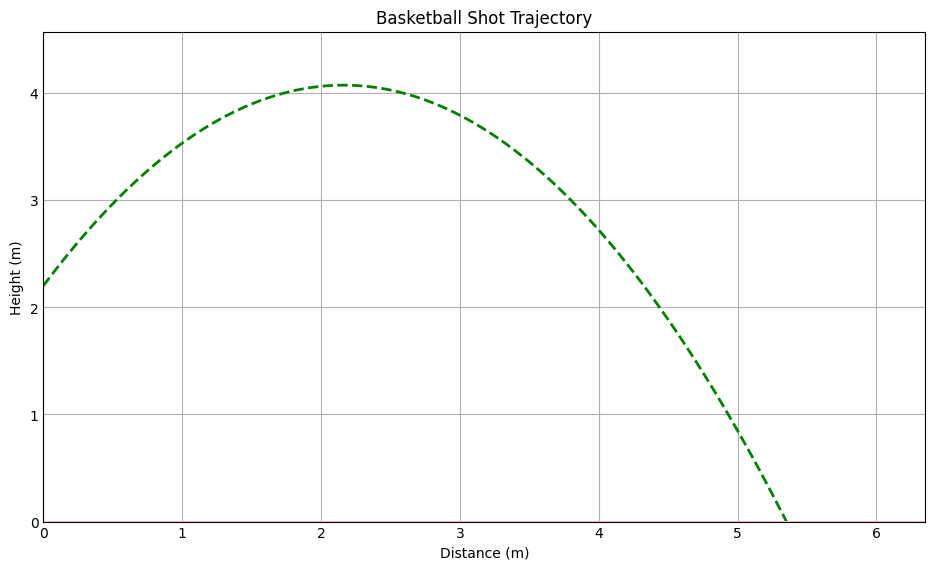

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

v0 = 7
theta = np.radians(60)
x_hoop = 4.6
y_hoop = 3.05
y0 = 2.2
g = 9.81

v0x = v0 * np.cos(theta)
v0y = v0 * np.sin(theta)

t_total = (v0y + np.sqrt(v0y**2 + 2 * g * y0)) / g
t_extended = np.linspace(0, t_total, num=200)

x_extended = v0x * t_extended
y_extended = y0 + v0y * t_extended - 0.5 * g * t_extended**2

fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(x_extended, y_extended, 'g--', linewidth=2)
ax.axhline(y=0, color="pink", linewidth=1.5)

try:
    pelican_img = mpimg.imread("pelican.jpg")
    img_extent = [x_hoop - 0.5, x_hoop + 0.5, y_hoop - 0.5, y_hoop + 0.5]
    ax.imshow(pelican_img, extent=img_extent, aspect='auto', zorder=3)
except FileNotFoundError:
    print("Error: bird not found.")

ax.set_xlabel("Distance (m)")
ax.set_ylabel("Height (m)")
ax.set_title("Basketball Shot Trajectory")
ax.grid(True)
ax.set_xlim(0, max(x_extended) + 1)
ax.set_ylim(0, max(y_extended) + 0.5)
plt.show()


In [21]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

scores = [76, 10, 21, 61, 40, 65, 40, 95, 77, 92, 59, 81, 76, 98, 57, 51, 92, 35, 17, 61, 35]
bins = [0, 20, 40, 60, 80, 100]
bar_colors = ['pink', 'white', 'blue', 'yellow', 'red']
img = mpimg.imread("bird.jpg")
fig, ax = plt.subplots(figsize=(8,6))
counts, _, patches = ax.hist(scores, bins=bins, edgecolor='black', rwidth=0.9)
for patch, color in zip(patches, bar_colors):
    patch.set_facecolor(color)


ax.imshow(img, aspect='auto', extent=ax.get_xlim() + ax.get_ylim(), alpha=0.8, zorder=-1)
ax.set_xlabel("Score Ranges", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.set_title("Student Score Distribution", fontsize=14)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'bird.jpg'

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

sample_rate, data = wavfile.read("john.wav")

if data.dtype == np.int16:
    data = data / np.iinfo(np.int16).max
elif data.dtype == np.int32:
    data = data / np.iinfo(np.int32).max
elif data.dtype == np.float32 or data.dtype == np.float64:
    pass

time = np.linspace(0, len(data) / sample_rate, num=len(data))

plt.figure(figsize=(10, 4))
plt.plot(time, data, color="green", alpha=0.7)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.ylim(-1, 1)
plt.grid()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'john.wav'